In [34]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np

In [13]:
mnist = fetch_openml("mnist_784", version=1, as_frame=False)

In [14]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [15]:
X = mnist.data
y = mnist.target
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


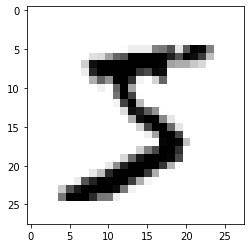

In [16]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap="binary")
plt.show()

In [35]:
y = y.astype(np.uint8)

In [36]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Binary Classifier - 5 Detector

In [37]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [38]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [40]:
sgd_clf.predict([some_digit])

array([ True])

In [41]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [42]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass

    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)


In [44]:
never5clf = Never5Classifier()
cross_val_score(never5clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [45]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [46]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [47]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [48]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [49]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

## Decision Function

In [51]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [57]:
"""HIGH RECALL"""
threshold = 0

In [58]:
"""If the score of a particular sample is greater than a set threshold then predict it as true.
    Here we calculated the score of sgd_clf on some digit and then compared it to our set
    threshold from which it is found to be higher hence predicted True.
"""
"""Scikit learn doesn't let us set the precision and recall directly but we can set a threshold
    according to our needs and the amount of precision or recall we want.
    FOR HIGHER PRECISION SET THRESHOLD TO BE VERY HIGH.
    FOR HIGHER RECALL SET THRESHOLD TO BE LOW.
"""
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [60]:
"""HIGH PRECISION"""
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [68]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [69]:
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [70]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [71]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.legend()
    plt.xlabel('Threshold')
    plt.grid()

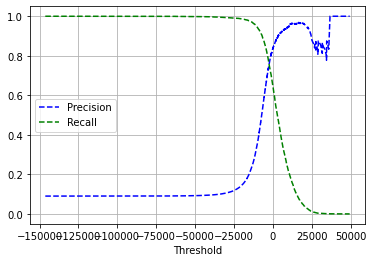

<Figure size 720x864 with 0 Axes>

In [81]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.figure(figsize=(10, 12))

YOU CAN ALSO PLOT PRECISION VS RECALL CURVE TO CHECK HOW THE PRECISION BEHAVES WRT RECALL AND DECIDE A SUITABLE VALUE FOR BOTH OF THEM SO THAT BOTH ARE SUFFICIENTLY HIGH

## ROC Curve (Used with binary classifiers)

In [82]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [83]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')

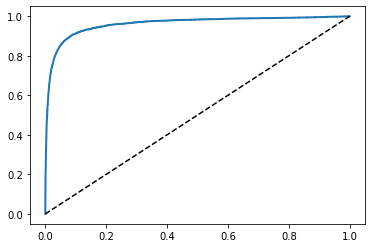

In [84]:
plot_roc_curve(fpr, tpr)
plt.show()

In [85]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

## Comparing SGDC with Random Forest Classifier on the basis of ROC curve and AUC(area under the curve) score

In [86]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

In [87]:
y_scores_forest = y_probas_forest[:, 1]     # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

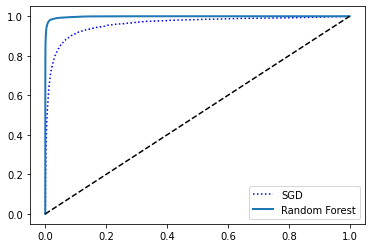

<Figure size 720x864 with 0 Axes>

In [91]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.gcf()
plt.figure(figsize=(10,12))
plt.show()

In [92]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [95]:
precision_score(y_train_5, y_probas_forest)

ValueError: Classification metrics can't handle a mix of binary and continuous-multioutput targets

In [96]:
y_pred = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)

In [97]:
precision_score(y_train_5, y_pred)

0.9905083315756169

In [98]:
recall_score(y_train_5, y_pred)

0.8662608374838591

# Multiclass Classification using binary classification algorithm

In [99]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train, y_train)       #Scikit learn automatically applies one-vs-one(for SVM) here
                                    # for multiclass classification using binary classifi algo
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [100]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores   # Returns 10 scores, one belonging to each class.

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [101]:
np.argmax(some_digit_scores)    # Returns the indices of max value along an axis

5

In [102]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [103]:
svm_clf.classes_[5]     # Return unique class which has a value of 5

5

Forcing Scikit Learn to use One vs One or One vs All and not decide automa based on algo.

In [104]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=SVC())

In [105]:
ovr_clf.predict([some_digit])

array([5], dtype=uint8)

In [106]:
len(ovr_clf.estimators_)

10

In [107]:
# Here scikit learn does not need to choose One vs ALl or One vs One because SGD algo can handle multiclass-classification as an inbuilt feature, it doesn't require these gimmicks.
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

In [108]:
sgd_clf.decision_function([some_digit])

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [109]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])